# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output

In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE
import torch

device = torch.device("cuda:1")

In [3]:
dataset = DataLoader(data_dir="DDICorpus", device=device)

In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-MedLine.d69.s0,0,0,12,TRAIN
1,DDI-MedLine.d69.s0,1,13,23,TRAIN
2,DDI-MedLine.d69.s0,2,24,26,TRAIN
3,DDI-MedLine.d69.s0,3,27,35,TRAIN
4,DDI-MedLine.d69.s0,4,36,51,TRAIN


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-MedLine.d69.s0,4,70,84
1,DDI-MedLine.d69.s0,4,141,150
2,DDI-MedLine.d69.s0,4,156,165
3,DDI-MedLine.d69.s1,4,28,42
4,DDI-MedLine.d69.s1,4,96,105


In [6]:
dataset.vocab[:15]

[['differential', 0],
 ['regulation', 1],
 ['of', 2],
 ['tyrosine', 3],
 ['phosphorylation', 4],
 ['in', 5],
 ['tumor', 6],
 ['cells', 7],
 ['by', 8],
 ['contortrostatin', 9],
 ['a', 10],
 ['homodimeric', 11],
 ['disintegrin', 12],
 ['and', 13],
 ['monomeric', 14]]

In [7]:
dataset.id2ner

{0: 'O', 1: 'drug', 2: 'group', 3: 'brand', 4: 'drug_n'}

In [8]:
dataset.max_sample_length

87

In [9]:
dataset.get_random_sample()

/home/guschenxi@GU.GU.SE/lt2316-h20-aa/aa/data_loading.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'in this study we investigated whether also DRUG:glycine fulfils the function as coactivator in glutamatergic activation of nmda receptors in the neuronal apparatus of spontaneous motility in chick embryos'

### Data Exploration

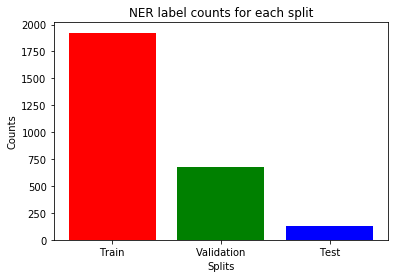

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [12]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        device=device,
                                                        id2word=dataset.id2word
                                                        #Add any addtional arguments here
                                                       ))

TRAIN Tensor Size: torch.Size([5069, 87, 5])
VAL Tensor Size: torch.Size([1763, 87, 5])
TEST Tensor Size: torch.Size([665, 87, 5])


## Bonus Part: Explore Some more

In [13]:
#uncomment the code below if you want to do bonus part

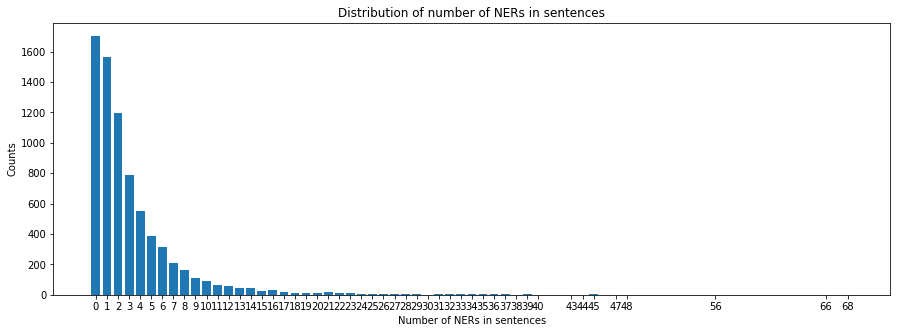

In [13]:
dataset.plot_ner_per_sample_distribution()

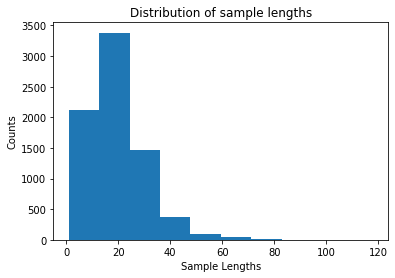

In [14]:
dataset.plot_sample_length_distribution()

In [ ]:
#dataset.plot_ner_cooccurence_venndiagram()